In [12]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [13]:
df= pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [41]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
Index: 45923 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              45923 non-null  int64         
 1   name                            45923 non-null  object        
 2   host_id                         45923 non-null  int64         
 3   host_name                       45923 non-null  object        
 4   neighbourhood_group             45923 non-null  object        
 5   neighbourhood                   45923 non-null  object        
 6   latitude                        45923 non-null  float64       
 7   longitude                       45923 non-null  float64       
 8   room_type                       45923 non-null  object        
 9   price                           45923 non-null  int64         
 10  minimum_nights                  45923 non-null  int64         
 11  number_

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

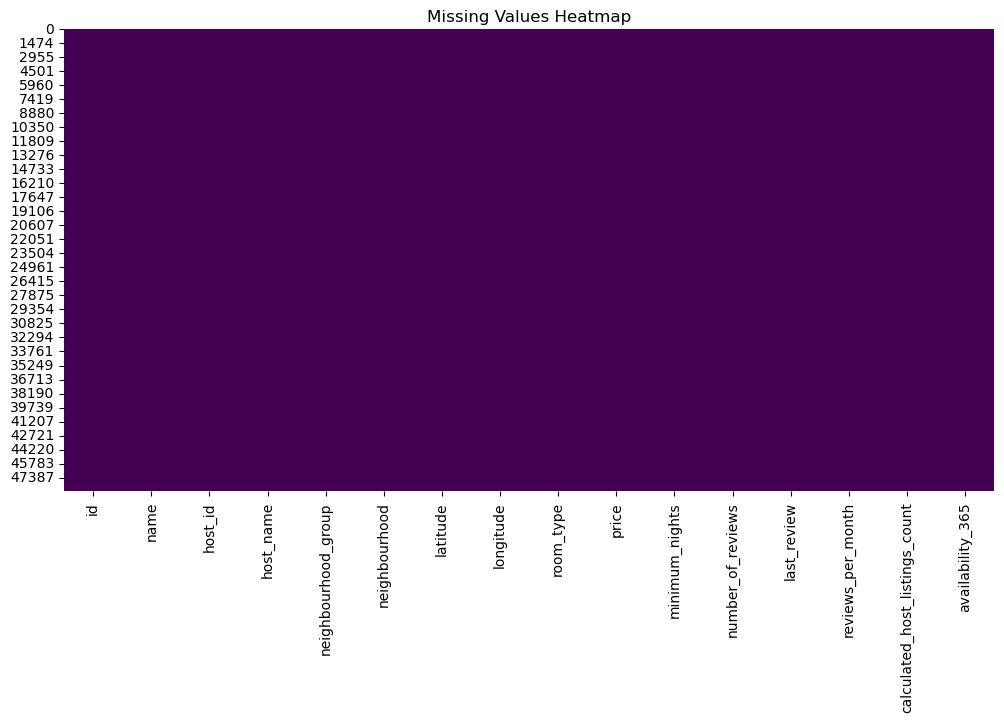

In [45]:
df.isnull().sum()

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [68]:
#dropping columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < 0.5]

#filling numeric missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

#filling categorical missing values with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [65]:
#checking for duplicates
df.duplicated().sum()

#removing duplicates
df = df.drop_duplicates()

In [63]:
#renaming columns for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#lowercase string columns
df['room_type'] = df['room_type'].str.lower()
df['host_name'] = df['host_name'].str.lower()

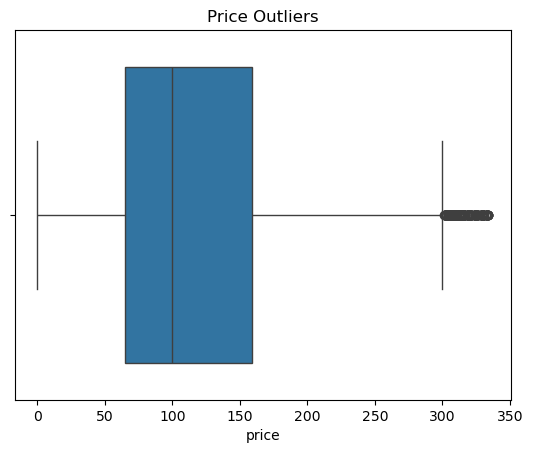

In [60]:
#boxplot for price
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()


In [61]:
#converting 'last_review' to datetime again
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

#ensuring numeric types
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')

In [69]:
#saving the cleaned dataset
df.to_csv("cleaned_airbnb_data.csv", index=False)